In [60]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd

In [61]:
df = pd.read_csv('train_classification.csv')
df

,Elevation,Aspect,Slope,Hillshade_Morning,Hillshade_Afternoon,Hillshade_Evening,Distance_To_River,Distance_From_Road,Distance_From_Pollutant,Sector,Soil,Plant_species
0,3251,35,10,219,218,134,30,3263,2837,Sector_2,Soil_36,1
1,3511,12,11,209,217,145,531,1385,1871,Sector_1,Soil_37,1
2,2335,63,20,233,194,83,234,1120,726,Sector_3,Soil_8,0
3,3244,48,14,224,209,116,67,1645,907,Sector_2,Soil_36,1
4,2242,292,34,108,211,233,95,808,684,Sector_3,Soil_8,3
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2238,103,28,253,192,48,42,787,1055,Sector_3,Soil_3,0
19996,2641,135,19,246,229,104,95,2307,2440,Sector_2,Soil_3,3
19997,1977,296,24,145,225,216,95,180,828,Sector_3,Soil_0,0
19998,3177,92,12,239,221,110,339,666,664,Sector_2,Soil_28,2


In [62]:
df['Sector'].unique()
Sector_converted=pd.get_dummies(df['Sector'],drop_first=True)
df['Soil'] = df['Soil'].map(lambda x: x.lstrip('Soil_'))
df['Soil'] = pd.to_numeric(df['Soil'])
df=pd.concat([df,Sector_converted],axis=1)
df = df.drop('Sector', axis=1)
df.head()


,Elevation,Aspect,Slope,Hillshade_Morning,Hillshade_Afternoon,Hillshade_Evening,Distance_To_River,Distance_From_Road,Distance_From_Pollutant,Soil,Plant_species,Sector_1,Sector_2,Sector_3
0,3251,35,10,219,218,134,30,3263,2837,36,1,0,1,0
1,3511,12,11,209,217,145,531,1385,1871,37,1,1,0,0
2,2335,63,20,233,194,83,234,1120,726,8,0,0,0,1
3,3244,48,14,224,209,116,67,1645,907,36,1,0,1,0
4,2242,292,34,108,211,233,95,808,684,8,3,0,0,1


In [63]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Plant_species', axis=1), df['Plant_species'],test_size=0.25, random_state=23)


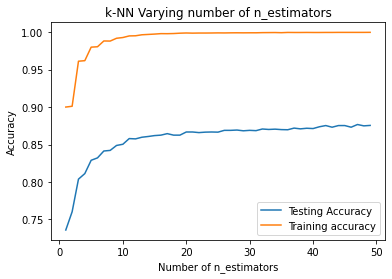

In [64]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = np.arange(1,50)
train_accuracy =np.empty(len(n_estimators))
test_accuracy = np.empty(len(n_estimators))

for i,k in enumerate(n_estimators):
    clf = RandomForestClassifier(n_estimators=k,max_depth=50, random_state=0)
    clf.fit(x_train, y_train)
    train_accuracy[i] = clf.score(x_train, y_train)
    test_accuracy[i] = clf.score(x_test, y_test) 

plt.title('k-NN Varying number of n_estimators')
plt.plot(n_estimators, test_accuracy, label='Testing Accuracy')
plt.plot(n_estimators, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of n_estimators')
plt.ylabel('Accuracy')
plt.show()




In [65]:
clf = RandomForestClassifier(n_estimators=100,max_depth=100, random_state=0, criterion='entropy', min_samples_split=4,min_samples_leaf=1, max_features='log2')
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.8788

In [66]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

clf=AdaBoostClassifier(n_estimators=50, random_state=0)
clf.fit(x_train,y_train)
pred2=clf.predict(x_test)
print(accuracy_score(y_test,pred2))

0.4398


In [67]:
tree_model=DecisionTreeClassifier(max_depth=5)
clf=AdaBoostClassifier(base_estimator=tree_model,n_estimators=15,random_state=0)
clf.fit(x_train,y_train)
pred3=clf.predict(x_test)
print(accuracy_score(y_test,pred3))

0.5788


In [68]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
clf=BaggingClassifier(n_estimators=100, max_features=13, random_state=0)
clf.fit(x_train,y_train)

pred5=clf.predict(x_test)
print(accuracy_score(y_test,pred5))

0.8684


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('train_classification.csv')
df1 = pd.read_csv('test_classification.csv')

"""
df['Sector'].unique()
Sector_converted=pd.get_dummies(df['Sector'],drop_first=True)
Sector_converted2=pd.get_dummies(df['Soil'],drop_first=True)
df=pd.concat([df,Sector_converted,Sector_converted2],axis=1)
df = df.drop('Sector', axis=1)
df = df.drop('Soil', axis=1)
df.head()
df1['Sector'].unique()
Sector_converted=pd.get_dummies(df1['Sector'],drop_first=True)
Sector_converted2=pd.get_dummies(df1['Soil'],drop_first=True)
df1=pd.concat([df1,Sector_converted,Sector_converted2],axis=1)
df1 = df1.drop('Sector', axis=1)
df1 = df1.drop('Soil', axis=1)
df1.head()
"""
df['Sector'] = df['Sector'].map(lambda x: x.lstrip('Sector_'))
df['Soil'] = df['Soil'].map(lambda x: x.lstrip('Soil_'))
df1['Sector'] = df1['Sector'].map(lambda x: x.lstrip('Sector_'))
df1['Soil'] = df1['Soil'].map(lambda x: x.lstrip('Soil_'))
df['Sector'] = pd.to_numeric(df['Sector'])
df['Soil'] = pd.to_numeric(df['Soil'])
df1['Sector'] = pd.to_numeric(df1['Sector'])
df1['Soil'] = pd.to_numeric(df1['Soil'])

df['add'] = df['Elevation']
df1['add'] = df1['Elevation']


from sklearn.ensemble import RandomForestClassifier
clf=BaggingClassifier( n_estimators=100)


ans_y = clf.fit(df.drop(['Plant_species'],axis=1),df['Plant_species']).predict(df1)



df_ans = pd.DataFrame()
df_ans['Id'] = df_ans.index
df_ans['Category']=pd.Series(ans_y)
df_ans['Id'] = df_ans.index
with open('csv_data1.csv', 'w') as csv_file:
    df_ans.to_csv(path_or_buf=csv_file,index=False)


In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('train_classification.csv')
df1 = pd.read_csv('test_classification.csv')

"""
df['Sector'].unique()
Sector_converted=pd.get_dummies(df['Sector'],drop_first=True)
Sector_converted2=pd.get_dummies(df['Soil'],drop_first=True)
df=pd.concat([df,Sector_converted,Sector_converted2],axis=1)
df = df.drop('Sector', axis=1)
df = df.drop('Soil', axis=1)
df.head()
df1['Sector'].unique()
Sector_converted=pd.get_dummies(df1['Sector'],drop_first=True)
Sector_converted2=pd.get_dummies(df1['Soil'],drop_first=True)
df1=pd.concat([df1,Sector_converted,Sector_converted2],axis=1)
df1 = df1.drop('Sector', axis=1)
df1 = df1.drop('Soil', axis=1)
df1.head()
"""
df['Sector'] = df['Sector'].map(lambda x: x.lstrip('Sector_'))
df['Soil'] = df['Soil'].map(lambda x: x.lstrip('Soil_'))
df1['Sector'] = df1['Sector'].map(lambda x: x.lstrip('Sector_'))
df1['Soil'] = df1['Soil'].map(lambda x: x.lstrip('Soil_'))
df['Sector'] = pd.to_numeric(df['Sector'])
df['Soil'] = pd.to_numeric(df['Soil'])
df1['Sector'] = pd.to_numeric(df1['Sector'])
df1['Soil'] = pd.to_numeric(df1['Soil'])

df['add'] = df['Elevation']
df1['add'] = df1['Elevation']


from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=140 ,max_depth=50, random_state=0)


ans_y = clf.fit(df.drop(['Plant_species'],axis=1),df['Plant_species']).predict(df1)



df_ans = pd.DataFrame()
df_ans['Id'] = df_ans.index
df_ans['Category']=pd.Series(ans_y)
df_ans['Id'] = df_ans.index
with open('csv_data2.csv', 'w') as csv_file:
    df_ans.to_csv(path_or_buf=csv_file,index=False)

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('train_classification.csv')
df1 = pd.read_csv('test_classification.csv')

"""
df['Sector'].unique()
Sector_converted=pd.get_dummies(df['Sector'],drop_first=True)
Sector_converted2=pd.get_dummies(df['Soil'],drop_first=True)
df=pd.concat([df,Sector_converted,Sector_converted2],axis=1)
df = df.drop('Sector', axis=1)
df = df.drop('Soil', axis=1)
df.head()
df1['Sector'].unique()
Sector_converted=pd.get_dummies(df1['Sector'],drop_first=True)
Sector_converted2=pd.get_dummies(df1['Soil'],drop_first=True)
df1=pd.concat([df1,Sector_converted,Sector_converted2],axis=1)
df1 = df1.drop('Sector', axis=1)
df1 = df1.drop('Soil', axis=1)
df1.head()
"""
df['Sector'] = df['Sector'].map(lambda x: x.lstrip('Sector_'))
df['Soil'] = df['Soil'].map(lambda x: x.lstrip('Soil_'))
df1['Sector'] = df1['Sector'].map(lambda x: x.lstrip('Sector_'))
df1['Soil'] = df1['Soil'].map(lambda x: x.lstrip('Soil_'))
df['Sector'] = pd.to_numeric(df['Sector'])
df['Soil'] = pd.to_numeric(df['Soil'])
df1['Sector'] = pd.to_numeric(df1['Sector'])
df1['Soil'] = pd.to_numeric(df1['Soil'])

df['add'] = df['Elevation']
df1['add'] = df1['Elevation']


from sklearn.ensemble import RandomForestClassifier
clf=BaggingClassifier( n_estimators=170)


ans_y = clf.fit(df.drop(['Plant_species'],axis=1),df['Plant_species']).predict(df1)



df_ans = pd.DataFrame()
df_ans['Id'] = df_ans.index
df_ans['Category']=pd.Series(ans_y)
df_ans['Id'] = df_ans.index
with open('csv_data3.csv', 'w') as csv_file:
    df_ans.to_csv(path_or_buf=csv_file,index=False)


In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('train_classification.csv')
df1 = pd.read_csv('test_classification.csv')

"""
df['Sector'].unique()
Sector_converted=pd.get_dummies(df['Sector'],drop_first=True)
Sector_converted2=pd.get_dummies(df['Soil'],drop_first=True)
df=pd.concat([df,Sector_converted,Sector_converted2],axis=1)
df = df.drop('Sector', axis=1)
df = df.drop('Soil', axis=1)
df.head()
df1['Sector'].unique()
Sector_converted=pd.get_dummies(df1['Sector'],drop_first=True)
Sector_converted2=pd.get_dummies(df1['Soil'],drop_first=True)
df1=pd.concat([df1,Sector_converted,Sector_converted2],axis=1)
df1 = df1.drop('Sector', axis=1)
df1 = df1.drop('Soil', axis=1)
df1.head()
"""
df['Sector'] = df['Sector'].map(lambda x: x.lstrip('Sector_'))
df['Soil'] = df['Soil'].map(lambda x: x.lstrip('Soil_'))
df1['Sector'] = df1['Sector'].map(lambda x: x.lstrip('Sector_'))
df1['Soil'] = df1['Soil'].map(lambda x: x.lstrip('Soil_'))
df['Sector'] = pd.to_numeric(df['Sector'])
df['Soil'] = pd.to_numeric(df['Soil'])
df1['Sector'] = pd.to_numeric(df1['Sector'])
df1['Soil'] = pd.to_numeric(df1['Soil'])

df['add'] = df['Elevation']
df1['add'] = df1['Elevation']


from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier( n_estimators=100, max_depth=10)


ans_y = clf.fit(df.drop(['Plant_species'],axis=1),df['Plant_species']).predict(df1)



df_ans = pd.DataFrame()
df_ans['Id'] = df_ans.index
df_ans['Category']=pd.Series(ans_y)
df_ans['Id'] = df_ans.index
with open('csv_data4.csv', 'w') as csv_file:
    df_ans.to_csv(path_or_buf=csv_file,index=False)


In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC



df = pd.read_csv('train_classification.csv')
df1 = pd.read_csv('test_classification.csv')


df['Sector'].unique()
Sector_converted=pd.get_dummies(df['Sector'],drop_first=True)
Sector_converted2=pd.get_dummies(df['Soil'],drop_first=True)
df=pd.concat([df,Sector_converted,Sector_converted2],axis=1)
df = df.drop('Sector', axis=1)
df = df.drop('Soil', axis=1)
df.head()
df1['Sector'].unique()
Sector_converted=pd.get_dummies(df1['Sector'],drop_first=True)
Sector_converted2=pd.get_dummies(df1['Soil'],drop_first=True)
df1=pd.concat([df1,Sector_converted,Sector_converted2],axis=1)
df1 = df1.drop('Sector', axis=1)
df1 = df1.drop('Soil', axis=1)
df1.head()
"""
df['Sector'] = df['Sector'].map(lambda x: x.lstrip('Sector_'))
df['Soil'] = df['Soil'].map(lambda x: x.lstrip('Soil_'))
df1['Sector'] = df1['Sector'].map(lambda x: x.lstrip('Sector_'))
df1['Soil'] = df1['Soil'].map(lambda x: x.lstrip('Soil_'))
df['Sector'] = pd.to_numeric(df['Sector'])
df['Soil'] = pd.to_numeric(df['Soil'])
df1['Sector'] = pd.to_numeric(df1['Sector'])
df1['Soil'] = pd.to_numeric(df1['Soil'])
"""
df['add'] = df['Elevation']
df1['add'] = df1['Elevation']


clf=BaggingClassifier( n_estimators=220)


ans_y = clf.fit(df.drop(['Plant_species'],axis=1),df['Plant_species']).predict(df1)



df_ans = pd.DataFrame()
df_ans['Id'] = df_ans.index
df_ans['Category']=pd.Series(ans_y)
df_ans['Id'] = df_ans.index
with open('csv_data5.csv', 'w') as csv_file:
    df_ans.to_csv(path_or_buf=csv_file,index=False)
